# Исследование рынка професии "Аналитик данных"

### Получение данных о вакансиях по api HH.ru

In [16]:
import pandas as pd
import requests
from tqdm import tqdm
from time import sleep

In [64]:
# Зададим период поиска вакансий
start_date = "2024-09-01"
end_date = "2024-10-20"

In [39]:
# Создадим список специализаций, связанных с аналитикой
roles = [
    "157",  # Руководитель отдела аналитики
    "156",  # BI-аналитик, аналитик данных
    "10",   # Аналитик
    "150",  # Бизнес-аналитик
    "164",  # Продуктовый аналитик
    "148",  # Системный аналитик
    "163",  # Маркетолог-аналитик
    "134"   # Финансовый аналитик, инвестиционный аналитик
]

Напишем функцию, которая вычислит количество страниц с вакансиями с разбивкой по специализациям

In [65]:

def get_pages_by_prof_roles(start_date, end_date, roles):
    url = "https://api.hh.ru/vacancies"
    result = {}

    for role in roles:
        # Создадим словарь с параметрами поиска
        params = {
            "area": "113",  # 113 - код для России
            "date_from": start_date,
            "date_to": end_date,
            "per_page": 1,   # 1 вакансия на страницу
            "professional_role": role
            }

        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            total_vacancies = data['found']
            total_pages = (total_vacancies // 100) + 1  # Рассчитываем количество страниц (api hh.ru возвращает 100 элементов на страницу)
            result[role] = {'total_vacancies': total_vacancies, 'total_pages': total_pages}
        else:
            print(f"Ошибка: {response.status_code}")
            result[role] = {'total_vacancies': 0, 'total_pages': 0}
    return result

In [69]:
pages_by_roles = get_pages_by_prof_roles(start_date, end_date, roles)

In [67]:
for role, data in pages_by_roles.items():
    print(f"Специализация {role}: {data['total_vacancies']} вакансий, {data['total_pages']} страниц")

Специализация 157: 388 вакансий, 4 страниц
Специализация 156: 1479 вакансий, 15 страниц
Специализация 10: 6522 вакансий, 66 страниц
Специализация 150: 2158 вакансий, 22 страниц
Специализация 164: 446 вакансий, 5 страниц
Специализация 148: 2689 вакансий, 27 страниц
Специализация 163: 871 вакансий, 9 страниц
Специализация 134: 1972 вакансий, 20 страниц


In [72]:
# Некоторые специализации имеют более 2000 вакансий
# Сделаем разбивку по периодам
periods = [
    ("2024-10-01", "2024-10-09"),
    ("2024-10-10", "2024-10-15"),
    ("2024-10-16", "2024-10-20")
]

# Пробежимся по списку с периодами с помощью цикла, где на каждой итерации будем вызывать нашу функцию.
# В качестве параметров будем использовать нашу разбивку по периодам
# Результат поместим в словарь
final_result = {}

for period in periods:
    period_result = get_pages_by_prof_roles(period[0], period[1], roles)
    for role, data in period_result.items():
        period_key = f"{role}_{period[0]}_{period[1]}"
        final_result[period_key] = {'total_vacancies': data['total_vacancies'], 'total_pages': data['total_pages']}


In [76]:
final_result

{'157_2024-10-01_2024-10-09': {'total_vacancies': 104, 'total_pages': 2},
 '156_2024-10-01_2024-10-09': {'total_vacancies': 418, 'total_pages': 5},
 '10_2024-10-01_2024-10-09': {'total_vacancies': 1778, 'total_pages': 18},
 '150_2024-10-01_2024-10-09': {'total_vacancies': 598, 'total_pages': 6},
 '164_2024-10-01_2024-10-09': {'total_vacancies': 145, 'total_pages': 2},
 '148_2024-10-01_2024-10-09': {'total_vacancies': 784, 'total_pages': 8},
 '163_2024-10-01_2024-10-09': {'total_vacancies': 204, 'total_pages': 3},
 '134_2024-10-01_2024-10-09': {'total_vacancies': 552, 'total_pages': 6},
 '157_2024-10-10_2024-10-15': {'total_vacancies': 98, 'total_pages': 1},
 '156_2024-10-10_2024-10-15': {'total_vacancies': 321, 'total_pages': 4},
 '10_2024-10-10_2024-10-15': {'total_vacancies': 1462, 'total_pages': 15},
 '150_2024-10-10_2024-10-15': {'total_vacancies': 483, 'total_pages': 5},
 '164_2024-10-10_2024-10-15': {'total_vacancies': 102, 'total_pages': 2},
 '148_2024-10-10_2024-10-15': {'total

In [73]:
# Разбивка по периодам помогла снизить количество вакансий в диапазон менее 2000
for role_period, data in final_result.items():
    print(f"Специализация и период {role_period}: {data['total_vacancies']} вакансий, {data['total_pages']} страниц")

Специализация и период 157_2024-10-01_2024-10-09: 104 вакансий, 2 страниц
Специализация и период 156_2024-10-01_2024-10-09: 418 вакансий, 5 страниц
Специализация и период 10_2024-10-01_2024-10-09: 1778 вакансий, 18 страниц
Специализация и период 150_2024-10-01_2024-10-09: 598 вакансий, 6 страниц
Специализация и период 164_2024-10-01_2024-10-09: 145 вакансий, 2 страниц
Специализация и период 148_2024-10-01_2024-10-09: 784 вакансий, 8 страниц
Специализация и период 163_2024-10-01_2024-10-09: 204 вакансий, 3 страниц
Специализация и период 134_2024-10-01_2024-10-09: 552 вакансий, 6 страниц
Специализация и период 157_2024-10-10_2024-10-15: 98 вакансий, 1 страниц
Специализация и период 156_2024-10-10_2024-10-15: 321 вакансий, 4 страниц
Специализация и период 10_2024-10-10_2024-10-15: 1462 вакансий, 15 страниц
Специализация и период 150_2024-10-10_2024-10-15: 483 вакансий, 5 страниц
Специализация и период 164_2024-10-10_2024-10-15: 102 вакансий, 2 страниц
Специализация и период 148_2024-10-10

Теперь напишем функцию для получения вакансий с hh.ru по api

In [83]:
def get_vacancies(final_result):
    url = "https://api.hh.ru/vacancies"
    all_vacancies = []

    for period_key, data in final_result.items():
        role, start_date, end_date = period_key.split('_')
        pages = data['total_pages']

        params = {
            "area": "113",     # 113 - код для России
            "date_from": start_date,
            "date_to": end_date,
            "professional_role": role,
            "per_page": 100,    # 100 вакансий на страницу
            "page": 0
        }

        vacancies = []
        for page in tqdm(range(pages), desc = f'Загрузка страниц для специализации {role} за период {start_date} - {end_date}'):
            params['page'] = page   # на каждой итерации обновляем номер страницы в params
            response = requests.get(url, params=params)
            if response.status_code == 200:     # код 200 - запрос выполнен успешно
                data = response.json()
                vacancies.extend(data['items'])
                sleep(0.5)  #добавил задержку, чтобы не получить ошибку 403
            else:
                print(f'Ошибка: {response.status_code}')
                break
        all_vacancies.extend(vacancies)

    return all_vacancies

In [84]:
vacancies = get_vacancies(final_result)

Загрузка страниц для специализации 157 за период 2024-10-01 - 2024-10-09: 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]
Загрузка страниц для специализации 156 за период 2024-10-01 - 2024-10-09: 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]
Загрузка страниц для специализации 10 за период 2024-10-01 - 2024-10-09: 100%|██████████| 18/18 [00:16<00:00,  1.08it/s]
Загрузка страниц для специализации 150 за период 2024-10-01 - 2024-10-09: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
Загрузка страниц для специализации 164 за период 2024-10-01 - 2024-10-09: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]
Загрузка страниц для специализации 148 за период 2024-10-01 - 2024-10-09: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]
Загрузка страниц для специализации 163 за период 2024-10-01 - 2024-10-09: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
Загрузка страниц для специализации 134 за период 2024-10-01 - 2024-10-09: 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]
Загрузка страниц для специализации 157 

In [ ]:
df_vacancies = pd.DataFrame(vacancies)

In [92]:
df_vacancies.to_excel('all_vacancies.xlsx', index=False)

In [90]:
df_vacancies.sample()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,branding,brand_snippet,immediate_redirect_url,immediate_redirect_vacancy_id
12262,107663310,False,Продуктовый маркетолог,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 120000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN,NaN,NaN,NaN


### Первичная обработка данных

In [ ]:
df_vacs = pd.read_excel('all_vacancies.xlsx')

In [ ]:
df_vacs

In [9]:
df_vacs.sample(3)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,branding,brand_snippet,immediate_redirect_url,immediate_redirect_vacancy_id
12602,108713648,False,Ведущий специалист управления бюджетирования (...,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Пресненская набе...",...,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN,NaN,NaN,NaN
11225,107295471,False,Бизнес-аналитик 1С,NaN,False,False,"{'id': '1613', 'name': 'Энгельс', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN,NaN,NaN,NaN
6574,108477954,False,Бизнес-аналитик,NaN,False,False,"{'id': '131', 'name': 'Симферополь', 'url': 'h...",NaN,"{'id': 'open', 'name': 'Открытая'}","{'city': 'село Белоглинка', 'street': 'Алексан...",...,False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN,NaN,NaN,NaN


In [10]:
df_vacs.shape

(13130, 40)

In [12]:
df_vacs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             13130 non-null  int64  
 1   premium                        13130 non-null  bool   
 2   name                           13130 non-null  object 
 3   department                     2713 non-null   object 
 4   has_test                       13130 non-null  bool   
 5   response_letter_required       13130 non-null  bool   
 6   area                           13130 non-null  object 
 7   salary                         4201 non-null   object 
 8   type                           13130 non-null  object 
 9   address                        7033 non-null   object 
 10  response_url                   49 non-null     object 
 11  sort_point_distance            0 non-null      float64
 12  published_at                   13130 non-null 

#### Находим дубликаты вакансий и удаляем их

In [17]:
# Находим дубликаты вакансий
duplicate_vacancies = df_vacs[df_vacs.duplicated(['id'], keep=False)]
duplicate_vacancies

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,branding,brand_snippet,immediate_redirect_url,immediate_redirect_vacancy_id
5798,108627172,False,Главный специалист в Отдел распродаж,NaN,False,False,"{'id': '53', 'name': 'Краснодар', 'url': 'http...","{'from': None, 'to': 70000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,"{'type': 'MAKEUP', 'tariff': None}",NaN,NaN,NaN
5799,108627172,False,Главный специалист в Отдел распродаж,NaN,False,False,"{'id': '53', 'name': 'Краснодар', 'url': 'http...","{'from': None, 'to': 70000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,"{'type': 'MAKEUP', 'tariff': None}",NaN,NaN,NaN
5998,106183058,False,Системный аналитик SQL,"{'id': '4649269-4649269-bigdata', 'name': 'ГК ...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}",NaN,...,False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,"{'type': 'MAKEUP', 'tariff': None}",NaN,NaN,NaN
5999,106183058,False,Системный аналитик SQL,"{'id': '4649269-4649269-bigdata', 'name': 'ГК ...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}",NaN,...,False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,"{'type': 'MAKEUP', 'tariff': None}",NaN,NaN,NaN


In [21]:
# Удаляем дубликаты вакансий
df_vacs = df_vacs.drop_duplicates(['id'], keep='first')
df_vacs.shape

(13128, 40)

#### Удалим ненужные столбцы

In [39]:
df_vacs.columns

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'area', 'salary', 'type', 'address',
       'response_url', 'sort_point_distance', 'published_at', 'created_at',
       'archived', 'apply_alternate_url', 'show_logo_in_search',
       'insider_interview', 'url', 'alternate_url', 'relations', 'employer',
       'snippet', 'contacts', 'schedule', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'professional_roles', 'accept_incomplete_resumes', 'experience',
       'employment', 'adv_response_url', 'is_adv_vacancy', 'adv_context',
       'branding', 'brand_snippet', 'immediate_redirect_url',
       'immediate_redirect_vacancy_id'],
      dtype='object')

In [40]:
columns_to_drop = ['premium', 'department', 'has_test', 'response_letter_required', 'type', 'address', 'response_url',
                   'sort_point_distance', 'created_at', 'archived', 'apply_alternate_url', 'show_logo_in_search',
                   'insider_interview', 'url', 'relations', 'contacts', 'working_days', 'working_time_intervals',
                   'working_time_modes', 'accept_temporary', 'accept_incomplete_resumes', 'adv_response_url',
                   'is_adv_vacancy', 'adv_context', 'branding', 'brand_snippet', 'immediate_redirect_url',
                   'immediate_redirect_vacancy_id']

df_vacs = df_vacs.drop(columns=columns_to_drop)

In [42]:
df_vacs.columns

Index(['id', 'name', 'area', 'salary', 'published_at', 'alternate_url',
       'employer', 'snippet', 'schedule', 'professional_roles', 'experience',
       'employment'],
      dtype='object')

In [66]:
# Восстанавливаем стандартную функцию type
type = __builtins__.type

# Проверим, что встроенная функция type восстановлена
print(type(42))  # Должно вывести: <class 'int'>

<class 'int'>


#### Проверяем форматы для каждого столбца

In [11]:
def check_column_types(df):
    column_types = {}
    for column in df.columns:
        column_types[column] = type(df.loc[0, column])
    return column_types

In [72]:
column_types = check_column_types(df_vacs)

pd.DataFrame(list(column_types.items()), columns=['Column', 'Type'])

,Column,Type
0,id,<class 'numpy.int64'>
1,name,<class 'str'>
2,area,<class 'str'>
3,salary,<class 'str'>
4,published_at,<class 'str'>
5,alternate_url,<class 'str'>
6,employer,<class 'str'>
7,snippet,<class 'str'>
8,schedule,<class 'str'>
9,professional_roles,<class 'str'>


In [202]:
df_vacs.to_excel('temp_vacancies_2.xlsx', index=False)

#### Разделяем колонки со словарями на отдельные столбцы

In [79]:
# Преобразуем столбцы, содержащие словари в строковом формате, в обычные словари
# Для этого будем использовать библиотеку ast

import ast

In [78]:
df_vacs.columns

Index(['id', 'name', 'area', 'salary', 'published_at', 'alternate_url',
       'employer', 'snippet', 'schedule', 'professional_roles', 'experience',
       'employment'],
      dtype='object')

In [80]:
# Список столбцов, содержащих словари, требующие преобразование формата

columns_to_convert = ['area', 'salary', 'employer', 'snippet', 'schedule', 'professional_roles', 'experience', 'employment']

In [81]:
for col in columns_to_convert:
    df_vacs[col] = df_vacs[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [82]:
column_types_new = check_column_types(df_vacs)

pd.DataFrame(list(column_types_new.items()), columns=['Column', 'Type'])

,Column,Type
0,id,<class 'numpy.int64'>
1,name,<class 'str'>
2,area,<class 'dict'>
3,salary,<class 'dict'>
4,published_at,<class 'str'>
5,alternate_url,<class 'str'>
6,employer,<class 'dict'>
7,snippet,<class 'dict'>
8,schedule,<class 'dict'>
9,professional_roles,<class 'list'>


##### Преобразуем столбец professional_roles

In [83]:
# Столбец professional_roles содержит список словарей
# Начнем преобразование с него

df_vacs.professional_roles[0]

[{'id': '157', 'name': 'Руководитель отдела аналитики'}]

In [84]:
df_vacs['role_id'] = df_vacs['professional_roles'].apply(lambda x: x[0]['id'] if isinstance(x, list) else None)
df_vacs['role_name'] = df_vacs['professional_roles'].apply(lambda x: x[0]['name'] if isinstance(x, list) else None)

##### Преобразуем столбец area

In [86]:
df_vacs.area[0]

{'id': '4', 'name': 'Новосибирск', 'url': 'https://api.hh.ru/areas/4'}

In [87]:
df_vacs['city_id'] = df_vacs['area'].apply(lambda x: x.get('id') if isinstance(x, dict) else None)
df_vacs['city'] = df_vacs['area'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

##### Преобразуем столбец employeer

In [91]:
df_vacs.employer[0]

{'id': '5838024',
 'name': 'Кадровое Агентство Averina.agency',
 'url': 'https://api.hh.ru/employers/5838024',
 'alternate_url': 'https://hh.ru/employer/5838024',
 'logo_urls': {'original': 'https://img.hhcdn.ru/employer-logo-original/1053260.png',
  '90': 'https://img.hhcdn.ru/employer-logo/5833689.png',
  '240': 'https://img.hhcdn.ru/employer-logo/5833690.png'},
 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=5838024',
 'accredited_it_employer': False,
 'trusted': True}

In [98]:
df_vacs['employer_id'] = df_vacs['employer'].apply(lambda x: x.get('id') if isinstance(x, dict) else None)
df_vacs['employer_name'] = df_vacs['employer'].apply(lambda x: x.get('name') if isinstance(x,dict) else None)

In [111]:
# Столбец employer_id содержит 27 пропусков, посмотрим, что это за компании

df_vacs[df_vacs['employer_id'].isna()]['employer_name']

8             Крупная торговая компания розничного ритейла
563                               Производственный холдинг
691               лидер индустрии пломбировочных устройств
712                                  Крупная FMCG компания
1420                               Крупный российский банк
1485         ИТ дистрибьютор с 30-летней историей на рынке
2794                                          Крупный банк
3901                                 Крупная FMCG компания
4030                                        Офис Акционера
4057                                 Крупная FMCG компания
4068                                 Крупная FMCG компания
4117                        Крупная финансовая организация
4780                             Международный DeFi проект
5386     ИТ компания с успешной историей на рынке более...
7881                           Проект о покере и не только
8097                                 Крупный успешный банк
9155                           Крупная добывающая компан

In [114]:
# Видим, что в наименовании работодателей нет конкретных организаций
# Установим id=0 для них

df_vacs['employer_id'].fillna(0, inplace=True)

##### Преобразуем столбец snippet

In [117]:
df_vacs.snippet[0]

{'requirement': 'Эффективный опыт внедрения проектов по модернизации ERP систем, СРМ-систем (1С, Битрикс). Опыт управления командой. Знание сетевых технологий. ',
 'responsibility': 'Аудит действующей инфраструктуры компании и действующих бизнес-процессов, выявление слабых мест и точек автоматизации. Разработка эффективных IT-решений в рамках...'}

In [120]:
df_vacs['requirement'] = df_vacs['snippet'].apply(lambda x: x.get('requirement') if isinstance(x, dict) else None)
df_vacs['responsibility'] = df_vacs['snippet'].apply(lambda x: x.get('responsibility') if isinstance(x,dict) else None)

##### Преобразуем столбец schedule

In [133]:
df_vacs.schedule[0]

{'id': 'fullDay', 'name': 'Полный день'}

In [134]:
df_vacs['schedule'] = df_vacs['schedule'].apply(lambda x: x.get('name') if isinstance(x,dict) else None)

##### Преобразуем столбец experience

In [139]:
df_vacs.experience[0]

{'id': 'between3And6', 'name': 'От 3 до 6 лет'}

In [145]:
df_vacs['experience'] = df_vacs['experience'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

##### Преобразуем столбец employment

In [142]:
df_vacs.employment[0]

{'id': 'full', 'name': 'Полная занятость'}

In [143]:
df_vacs['employment'] = df_vacs['employment'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

##### Преобразуем столбец salary

In [146]:
df_vacs['salary_from'] = df_vacs['salary'].apply(lambda x: x.get('from') if isinstance(x, dict) else None)
df_vacs['salary_to'] = df_vacs['salary'].apply(lambda x: x.get('to') if isinstance(x, dict) else None)
df_vacs['currency'] = df_vacs['salary'].apply(lambda x: x.get('currency') if isinstance(x, dict) else None)
df_vacs['gross'] = df_vacs['salary'].apply(lambda x: x.get('gross') if isinstance(x, dict) else None)

In [147]:
df_vacs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13128 entries, 0 to 13129
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  13128 non-null  int64  
 1   name                13128 non-null  object 
 2   area                13128 non-null  object 
 3   salary              4200 non-null   object 
 4   published_at        13128 non-null  object 
 5   alternate_url       13128 non-null  object 
 6   employer            13128 non-null  object 
 7   snippet             13128 non-null  object 
 8   schedule            13128 non-null  object 
 9   professional_roles  13128 non-null  object 
 10  experience          13128 non-null  object 
 11  employment          13128 non-null  object 
 12  role_id             13128 non-null  object 
 13  role_name           13128 non-null  object 
 14  city_id             13128 non-null  object 
 15  city                13128 non-null  object 
 16  employer_

##### Удалим использованные столбцы

In [148]:
df_vacs = df_vacs.drop(['area', 'salary', 'employer', 'snippet', 'professional_roles'], axis=1)

In [149]:
df_vacs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13128 entries, 0 to 13129
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              13128 non-null  int64  
 1   name            13128 non-null  object 
 2   published_at    13128 non-null  object 
 3   alternate_url   13128 non-null  object 
 4   schedule        13128 non-null  object 
 5   experience      13128 non-null  object 
 6   employment      13128 non-null  object 
 7   role_id         13128 non-null  object 
 8   role_name       13128 non-null  object 
 9   city_id         13128 non-null  object 
 10  city            13128 non-null  object 
 11  employer_id     13128 non-null  object 
 12  employer_name   13128 non-null  object 
 13  requirement     13074 non-null  object 
 14  responsibility  13065 non-null  object 
 15  expirience      13128 non-null  object 
 16  salary_from     3659 non-null   float64
 17  salary_to       2125 non-null   floa

In [169]:
pd.DataFrame(check_column_types(df_vacs).items(), columns=['Column', 'Type'])

,Column,Type
0,id,<class 'numpy.int64'>
1,name,<class 'str'>
2,published_at,<class 'str'>
3,alternate_url,<class 'str'>
4,schedule,<class 'str'>
5,experience,<class 'str'>
6,employment,<class 'str'>
7,role_id,<class 'str'>
8,role_name,<class 'str'>
9,city_id,<class 'str'>


#### Преобразуем столбец published_at в формат datetime

In [180]:
df_vacs['published_at'] = pd.to_datetime(df_vacs['published_at']).dt.date

In [181]:
print(df_vacs.published_at[0])

2024-10-03


#### Конвертируем иностранные валюты в рубли

In [175]:
# Некоторые зарплаты указаны в иностранной валюте
df_vacs.currency.value_counts()

currency
RUR    4162
USD      31
EUR       5
KZT       2
Name: count, dtype: int64

In [177]:
 # Конвертируем все зарплаты в рубли
 # Для этого создадим словарь с курсами валют (по состоянию на 24.10.24)

exchange_rates = {
    'USD': 96.74,
    'EUR': 104.51,
    'KZT': 0.19,
    'RUR': 1
    }

In [192]:
df_vacs['salary_from'] = df_vacs.apply(
    lambda x: x['salary_from'] * exchange_rates[x['currency']] if pd.notna(x['salary_from']) else None, axis=1
)

df_vacs['salary_to'] = df_vacs.apply(
    lambda x: x['salary_to'] * exchange_rates[x['currency']] if pd.notna(x['salary_to']) else None, axis=1
)

#### Рассчитаем все зарплаты без учета налогов

In [193]:
# Часть зарплат указана до вычета налогов, другая "на руки" (gross = true/false)
df_vacs.gross.value_counts()

gross
False    2638
True     1559
Name: count, dtype: int64

In [196]:
# Рассчитаем все зарплаты без учета налогов

df_vacs['salary_from'] = df_vacs.apply(
    lambda x: x['salary_from'] * 0.87 if x['gross']==True else x['salary_from'], axis=1
)

df_vacs['salary_to'] = df_vacs.apply(
    lambda x: x['salary_to'] * 0.87 if x['gross']==True else x['salary_to'], axis=1
)

#### Объединим столбцы salary_from и salary_to

In [213]:
# Будем использовать среднее значение, для этого импортируем библиотеку numpy
import numpy as np

In [216]:
# Если одно из значений пусто, будем брать непустое
# Если оба пустые, вернем None
# Если оба заполнены, вернем среднее

df_vacs['avg_salary'] = df_vacs.apply(
    lambda x: None if pd.isna(x['salary_from']) and pd.isna(x['salary_to'])
    else x['salary_to'] if pd.isna(x['salary_from'])
    else x['salary_from'] if pd.isna(x['salary_to'])
    else np.mean([x['salary_from'], x['salary_to']]),
    axis=1
)

#### Заполняем пустые значения зарплат

In [249]:
# Так как зарплаты в Москве и Санкт-Петербурге обычно выше, разделим их на группы

df_vacs['city_group'] = df_vacs['city_id'].apply(
    lambda x: 'Москва+СПб' if x in ['1', '2'] else 'Другие города')

In [250]:
# Рассчитаем медианы зарплат по группам "специализация", "опыт", "город"

medians = df_vacs.groupby(['role_name', 'experience', 'city_group'])['avg_salary'].median().reset_index()
medians.rename(columns={'avg_salary': 'median_salary'}, inplace=True)

In [256]:
# Объединим датафрейм medians с датафреймом df_vacs

df_vacs = df_vacs.merge(medians, on=['role_name', 'experience', 'city_group'], how='left')

In [257]:
# Заполним пустые значения зарплат мединными значениями

df_vacs['salary'] = df_vacs.apply(lambda x: x['median_salary'] if pd.isna(x['avg_salary']) else x['avg_salary'], axis=1)

In [267]:
# Сохраним полученный датафрейм
df_vacs.to_excel('temp_vacancies_3.xlsx', index=False)

In [6]:
# Удалим ненужные столбцы
df_vacs.drop(columns=['salary_from', 'salary_to', 'currency', 'gross', 'avg_salary', 'city_group', 'median_salary'], inplace=True)

In [18]:
df_vacs.describe().map(lambda x: '{:.2f}'.format(x))

,id,salary
count,13121.00,13121.00
mean,106608259.23,142898.44
std,4376681.73,67473.26
min,16093139.00,100.00
25%,106796703.00,93525.00
50%,108091948.00,130000.00
75%,108498727.00,186615.00
max,108912939.00,1325000.00


In [21]:
df_vacs.to_pickle('df_vacs_backup.pkl')

### Анализ полученного датасета

In [4]:
df_vacs = pd.read_pickle('df_vacs_backup.pkl')

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_vacs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13121 entries, 0 to 13120
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              13121 non-null  int64  
 1   name            13121 non-null  object 
 2   published_at    13121 non-null  object 
 3   alternate_url   13121 non-null  object 
 4   schedule        13121 non-null  object 
 5   experience      13121 non-null  object 
 6   employment      13121 non-null  object 
 7   role_id         13121 non-null  object 
 8   role_name       13121 non-null  object 
 9   city_id         13121 non-null  object 
 10  city            13121 non-null  object 
 11  employer_id     13121 non-null  object 
 12  employer_name   13121 non-null  object 
 13  requirement     13067 non-null  object 
 14  responsibility  13058 non-null  object 
 15  salary          13121 non-null  float64
dtypes: float64(1), int64(1), object(14)
memory usage: 1.6+ MB


#### Анализ распределения вакансий по городам

In [11]:
import folium
from geopy.geocoders import Nominatim
from tqdm.notebook import tqdm

In [12]:
# Инициализация геолокатора
geolocator = Nominatim(user_agent="vacancy_map")

# Функция для получения координат города
def get_coordinates(city):
    try:
        location = geolocator.geocode(city + ', Russia')
        return (location.latitude, location.longitude)
    except:
        return None

In [86]:
# Создадим список городов из датасета
top_30_cities = df_vacs['city'].value_counts().index

In [87]:
# Получаем координаты для городов из датасета
city_coords = {city: get_coordinates(city) for city in top_30_cities}

In [88]:
print(city_coords)


{'Москва': (55.625578, 37.6063916), 'Санкт-Петербург': (59.938732, 30.316229), 'Екатеринбург': (56.839104, 60.60825), 'Казань': (55.7823547, 49.1242266), 'Новосибирск': (55.0288307, 82.9226887), 'Нижний Новгород': (56.3264816, 44.0051395), 'Краснодар': (45.0351532, 38.9772396), 'Воронеж': (51.6605982, 39.2005858), 'Самара': (53.2194648, 50.2039316), 'Ростов-на-Дону': (47.2216548, 39.7096061), 'Пермь': (58.014965, 56.246723), 'Владивосток': (43.1150678, 131.8855768), 'Тюмень': (57.153534, 65.542274), 'Омск': (54.991375, 73.371529), 'Уфа': (54.7261409, 55.947499), 'Челябинск': (55.1598408, 61.4025547), 'Красноярск': (56.0091173, 92.872586), 'Саратов': (51.530018, 46.034683), 'Томск': (56.4887526, 84.9523434), 'Ижевск': (56.86051745, 53.197730742455306), 'Волгоград': (48.7081906, 44.5153353), 'Тула': (54.1930321, 37.61754), 'Рязань': (54.6295687, 39.7425039), 'Калининград': (54.710128, 20.5105838), 'Тверь': (56.8596713, 35.89524161906262), 'Ярославль': (57.6263877, 39.8933705), 'Иркутск':

In [92]:
# Группировка данных по городам и подсчет количества вакансий
vacancies_by_city = df_vacs['city'].value_counts().loc[top_30_cities].to_dict()

In [96]:
# Создаем карту
vacancy_map = folium.Map(location=[55.751244, 37.618423], zoom_start=4)

In [97]:
for city, count in vacancies_by_city.items():
    coordinates = city_coords.get(city)
    if coordinates:
        radius = np.log(count + 1) * 3  # Радиус пропорционален количеству вакансий
        folium.CircleMarker(
            location=coordinates,
            radius=radius,
            fill=True,
            fill_color='blue'
        ).add_to(vacancy_map)

In [98]:
vacancy_map

In [99]:
vacancy_map.save('vacancy_map.html')

#### Анализ распределения вакансий по работодателю

In [104]:
sns.set(style="whitegrid", palette="coolwarm")

In [105]:
top_employers = df_vacs['employer_name'].value_counts().head(10)

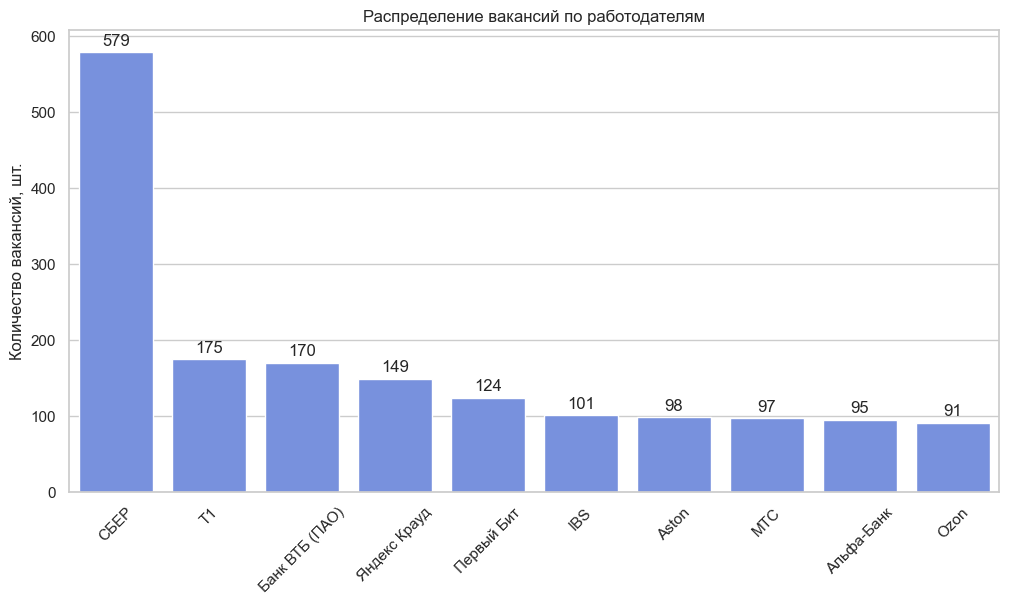

In [109]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_employers.index, y=top_employers.values)

for index, value in enumerate(top_employers.values):
    ax.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Распределение вакансий по работодателям')
plt.ylabel('Количество вакансий, шт.')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

Большинство вакансий предлагает Сбер.
Кроме того, из топ-10 половина работодателей не являются сугубо IT-компаниями.
Аналитики данных востребованы в крупных организациях с большими объемами информации.

#### Анализ распределения вакансий по графику работы

In [113]:
schedule_types = df_vacs['schedule'].value_counts()

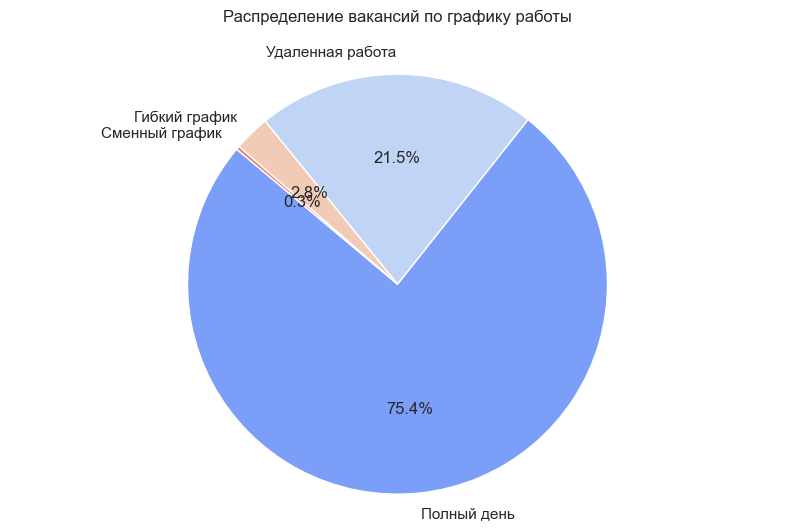

In [117]:
plt.figure(figsize=(10, 6))
plt.pie(schedule_types, labels=schedule_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(schedule_types)))
plt.title('Распределение вакансий по графику работы', y=1.05)  # Поднятие заголовка выше
plt.axis('equal')  # Устанавливаем равные оси для корректного отображения круга
plt.show()

Удаленную работу для аналитиков данных предлагают только пятая часть работодателей.
Три четверти вакансий имеют график полного рабочего дня.
Возможно, это связано с ограничениями в виде предоставления доступов к базам данных.

#### Анализ распределения вакансий по дате публикации

In [193]:
vacancies_by_date = df_vacs.groupby(df_vacs['published_at'].dt.date).size().reset_index(name='count')

In [196]:
# Уберем выходные дни из выборки, в них почти нет опубликованных вакансий
vacancies_by_date['is_weekend'] = vacancies_by_date['published_at'].apply(lambda x: x.weekday() >= 5)
vacancies_by_date = vacancies_by_date[~vacancies_by_date['is_weekend']]

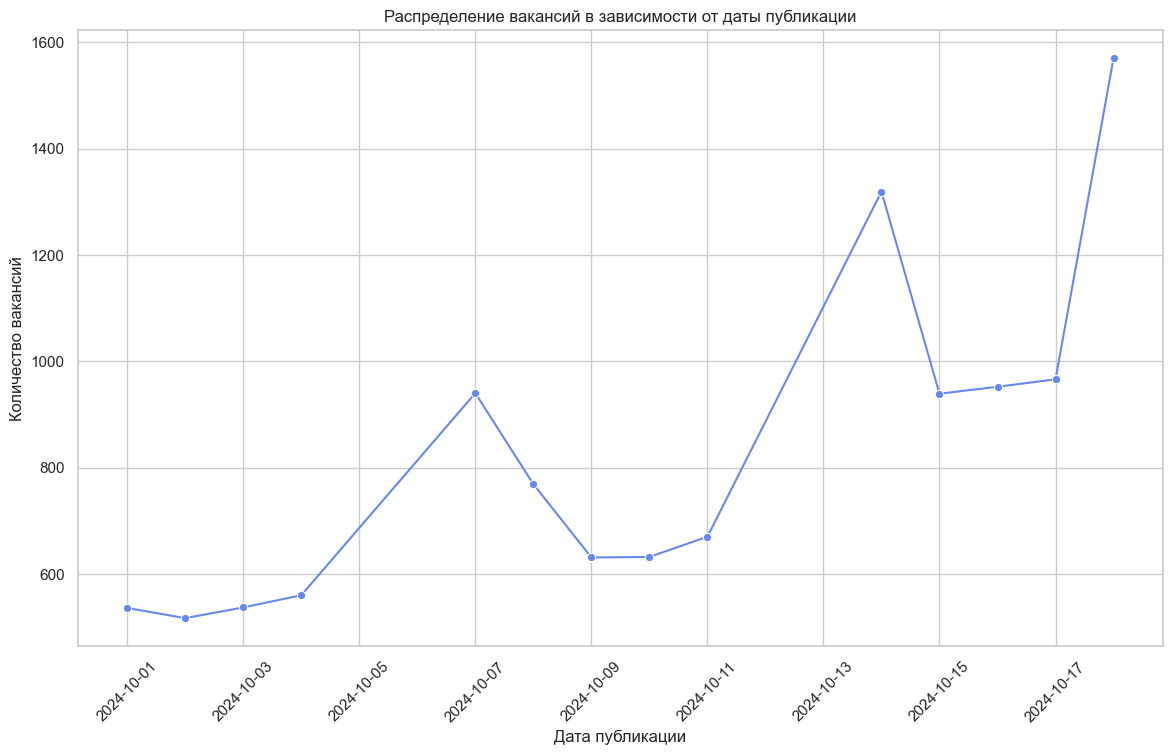

In [197]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='published_at', y='count', data=vacancies_by_date, marker='o')
plt.title('Распределение вакансий в зависимости от даты публикации')
plt.xlabel('Дата публикации')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()


Вакансий опубликованных за последнюю неделю больше, чем за начало исследуемого периода.
Кроме того, изначально мною был выбран период с 01.09 по 20.10, но в процессе исследования выяснилось, что вакансий, опубликованных в сентябре, практически нет. Скорее всего, это говорит о том, что работодатели быстро находят кандидатов и закрывают вакансии.

#### Анализ распределения вакансий по специализации

In [119]:
specializations = df_vacs['role_name'].value_counts().head(10)

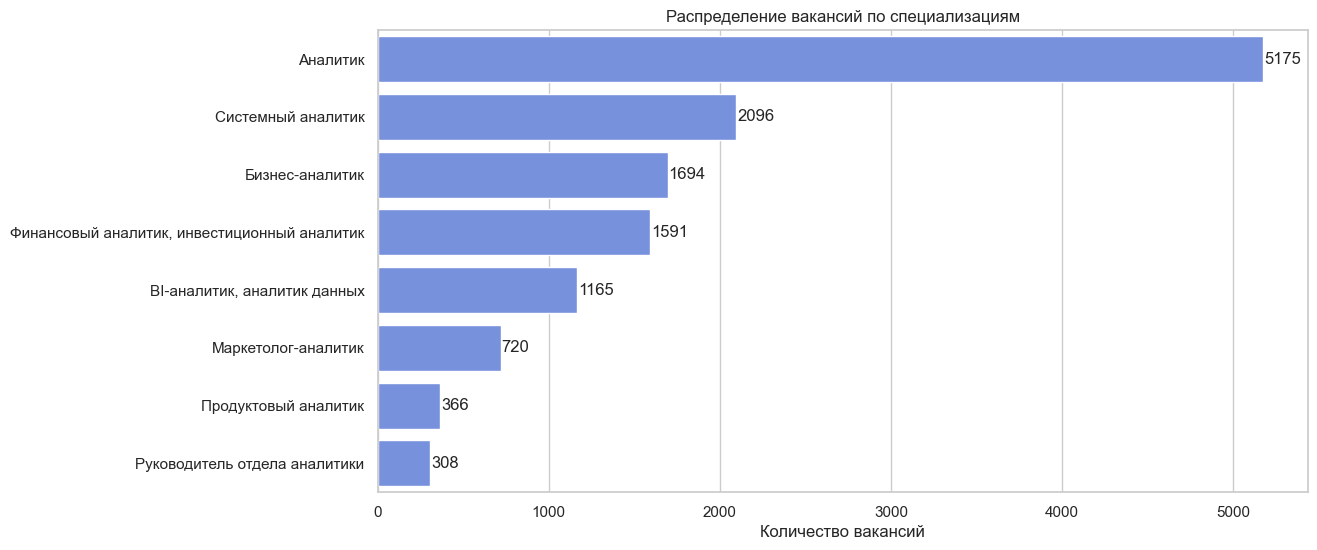

In [122]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=specializations.values, y=specializations.index)

# Добавление подписей к столбцам
for index, value in enumerate(specializations.values):
    ax.text(value + 5, index, str(value), va='center')

plt.title('Распределение вакансий по специализациям')
plt.xlabel('Количество вакансий')
plt.ylabel('')
plt.show()


Большинство вакансий имеют специализацию "Аналитик", но это достаточно широкая и размытая категория, в которую входит большое количество разных вакансий. Если говорить о более узконаправленных специализациях, то здесь лидирует системный аналитик, отстают продуктовые аналитики и руководители отдела аналитик.

#### Анализ распределения зарплат по специализациям

In [169]:
df_vacs['salary'].nlargest(10)

12929    1325000.0
11375     725550.0
8274      700000.0
12554     674250.0
12815     650000.0
8277      600000.0
12617     600000.0
12764     550000.0
8493      532070.0
6458      504982.8
Name: salary, dtype: float64

In [168]:
# Здесь я добавил условие по зарплате менее 1325000, чтобы убрать один выброс, сильно искажающий график
all_cities_data = df_vacs[df_vacs['salary'] < 1325000]

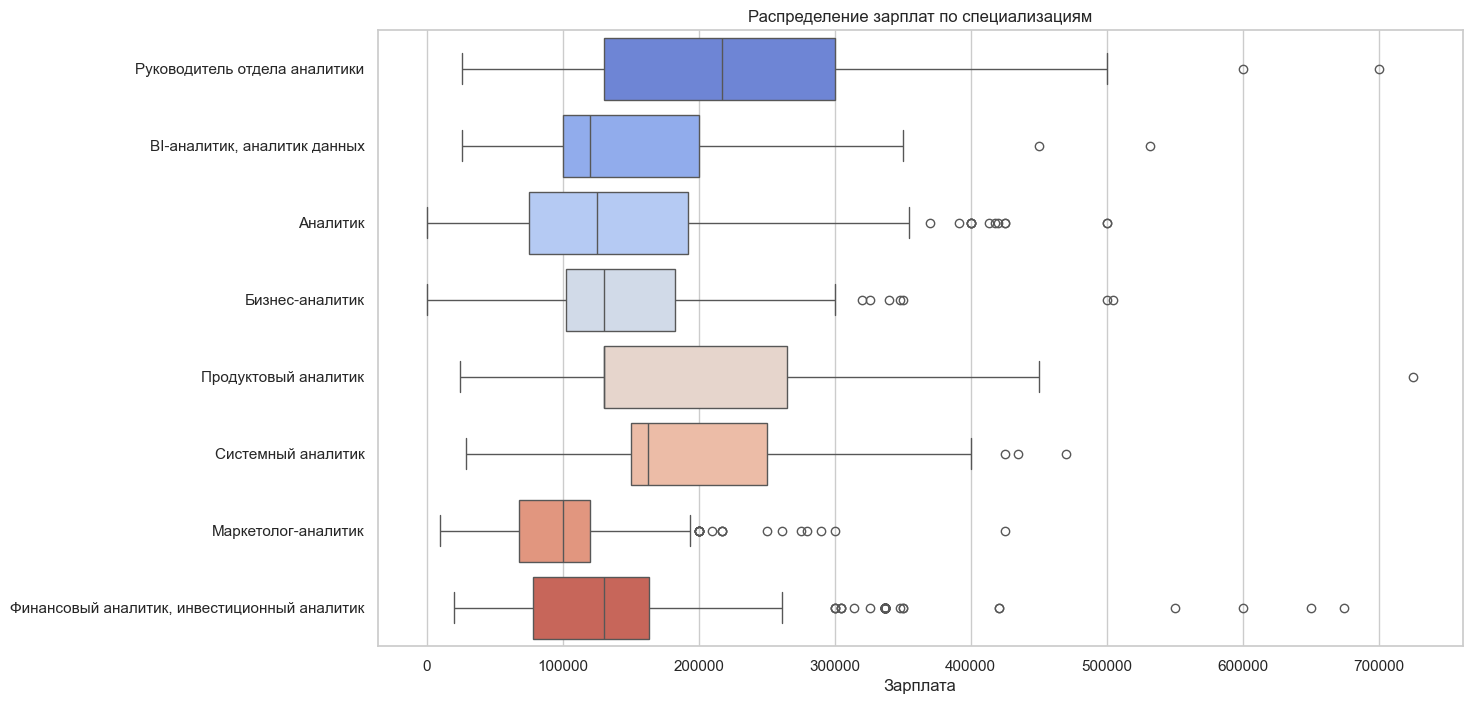

In [167]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='salary', y='role_name', data=all_cities_data, hue='role_name', palette='coolwarm', dodge=False)
plt.title('Распределение зарплат по специализациям')
plt.xlabel('Зарплата')
plt.ylabel('')
plt.show()

In [170]:
for role in all_cities_data.role_name.value_counts().index:
    print(f'{role}: {all_cities_data[all_cities_data['role_name'] == role]['salary'].median()}')

Аналитик: 125000.0
Системный аналитик: 162500.0
Бизнес-аналитик: 130000.0
Финансовый аналитик, инвестиционный аналитик: 130500.0
BI-аналитик, аналитик данных: 120000.0
Маркетолог-аналитик: 100000.0
Продуктовый аналитик: 130500.0
Руководитель отдела аналитики: 217500.0


Количество вакансий по специализации "Руководитель отдела аналитики" меньше остальных, но имеет самую высокую медианную зарплату - более 200 т.р. При этом вилка может достигать около 500 т.р. По всем специализациям наблюдается значительный разброс зарплат. Проанализируем зарплаты только по г.Москве, где представлено большинство вакансий.

##### Анализ распределения зарплат по специализациям в Москве и Санкт-Петербурге

In [144]:
# Фильтрация данных по городам Москва и Санкт-Петербург
moscow_spb_data = df_vacs[df_vacs['city'].isin(['Москва', 'Санкт-Петербург'])]

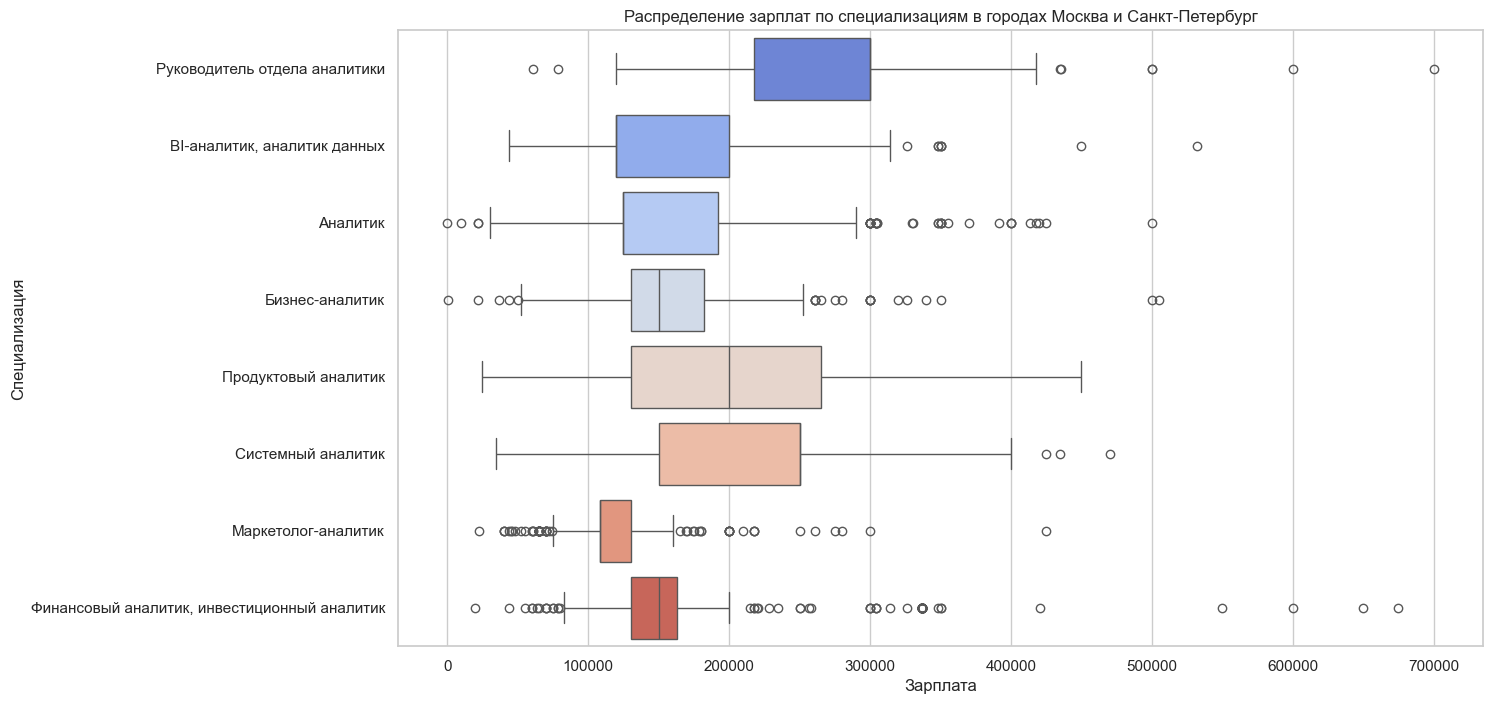

In [143]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='salary', y='role_name', data=moscow_spb_data, hue='role_name', palette='coolwarm')
plt.title('Распределение зарплат по специализациям в городах Москва и Санкт-Петербург')
plt.xlabel('Зарплата')
plt.ylabel('Специализация')
plt.show()

In [150]:
for role in moscow_spb_data.role_name.value_counts().index:
    print(f'{role}: {moscow_spb_data[moscow_spb_data['role_name'] == role]['salary'].median()}')

Аналитик: 125000.0
Системный аналитик: 250000.0
Бизнес-аналитик: 131500.0
Финансовый аналитик, инвестиционный аналитик: 147900.0
BI-аналитик, аналитик данных: 120000.0
Маркетолог-аналитик: 108000.0
Продуктовый аналитик: 178350.0
Руководитель отдела аналитики: 300000.0


В вакансиях по Москве и Санкт-Петербургу основная масса зарплат значительно повысилась.
Например, 50% вакансий специализации "Руководитель отдела аналитики" предлагают не менее 200 тысяч рублей, медианная зарплата повысилась до 300 тысяч рублей. Теперь рассмотрим распределение зарплат в остальных городах.

##### Анализ распределения зарплат по специализациям в остальных городах

In [152]:
df_vacs['city_group'] = df_vacs['city_id'].apply(
    lambda x: 'Москва+СПб' if x in ['1', '2'] else 'Другие города')

In [159]:
# Здесь я добавил условие по зарплате менее 1325000, чтобы убрать один выброс, сильно искажающий график
other_cities_data = df_vacs[(df_vacs['city_group'] == 'Другие города') & (df_vacs['salary'] < 1325000)]

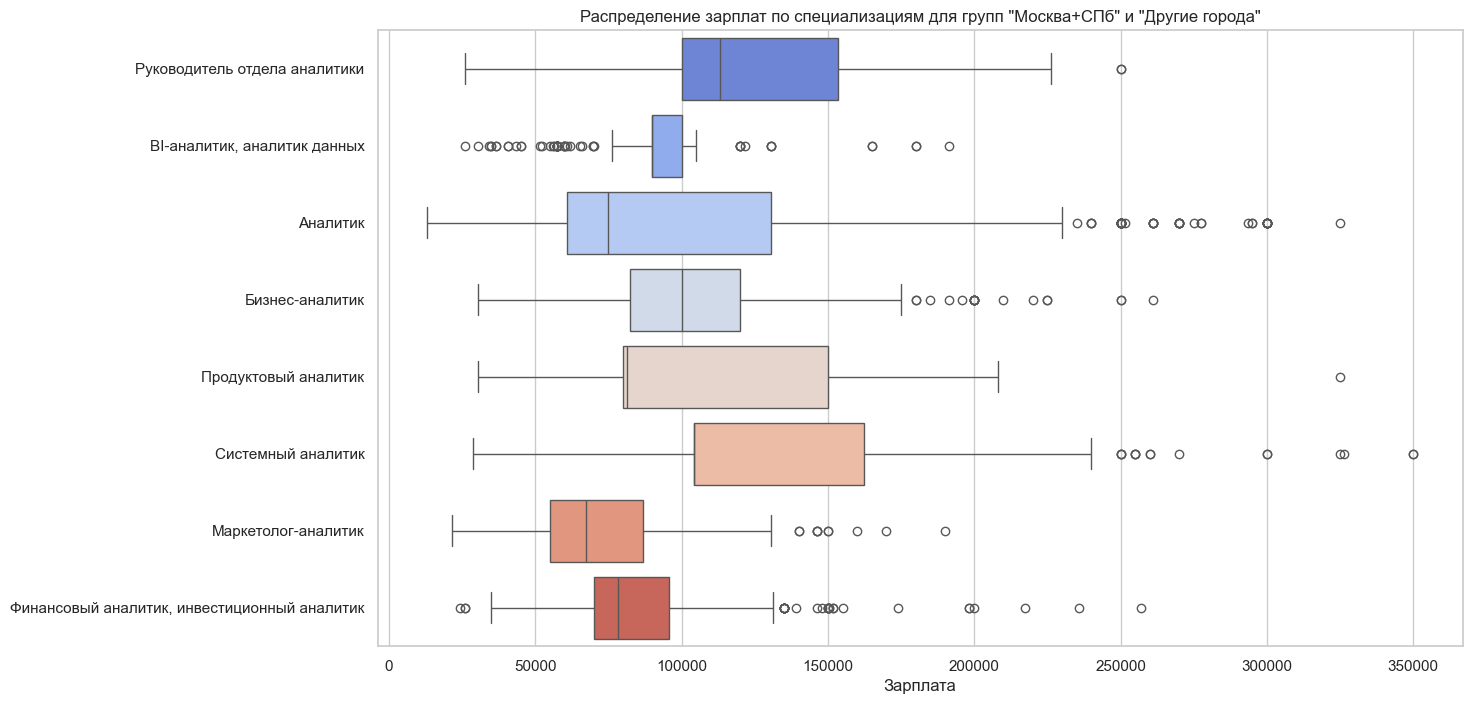

In [160]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='salary', y='role_name', hue='role_name', data=other_cities_data, palette='coolwarm')
plt.title('Распределение зарплат по специализациям для групп "Москва+СПб" и "Другие города"')
plt.xlabel('Зарплата')
plt.ylabel('')
plt.show()

In [171]:
for role in other_cities_data.role_name.value_counts().index:
    print(f'{role}: {other_cities_data[other_cities_data['role_name'] == role]['salary'].median()}')

Аналитик: 75000.0
Финансовый аналитик, инвестиционный аналитик: 78414.405
Системный аналитик: 104400.0
Бизнес-аналитик: 100000.0
Маркетолог-аналитик: 67500.0
BI-аналитик, аналитик данных: 90000.0
Руководитель отдела аналитики: 113100.0
Продуктовый аналитик: 81325.0


В регионах наблюдается более низкий уровень зарплат. 50% вакансий для специализации "Руководитель аналитики данных" предлагают от 100 т.р. до чуть более 150 т.р. В целом медианные зарплаты по всем специализациям лежат в диапазоне от 70 до 100 тысяч рублей. Объединим данные регионов и Москвы с Санкт-Петербургом на одном графике, чтобы понять разницу.

##### Анализ распределения зарплат по специализациям в сравнении Москвы и Санкт-Петербурга с регионами

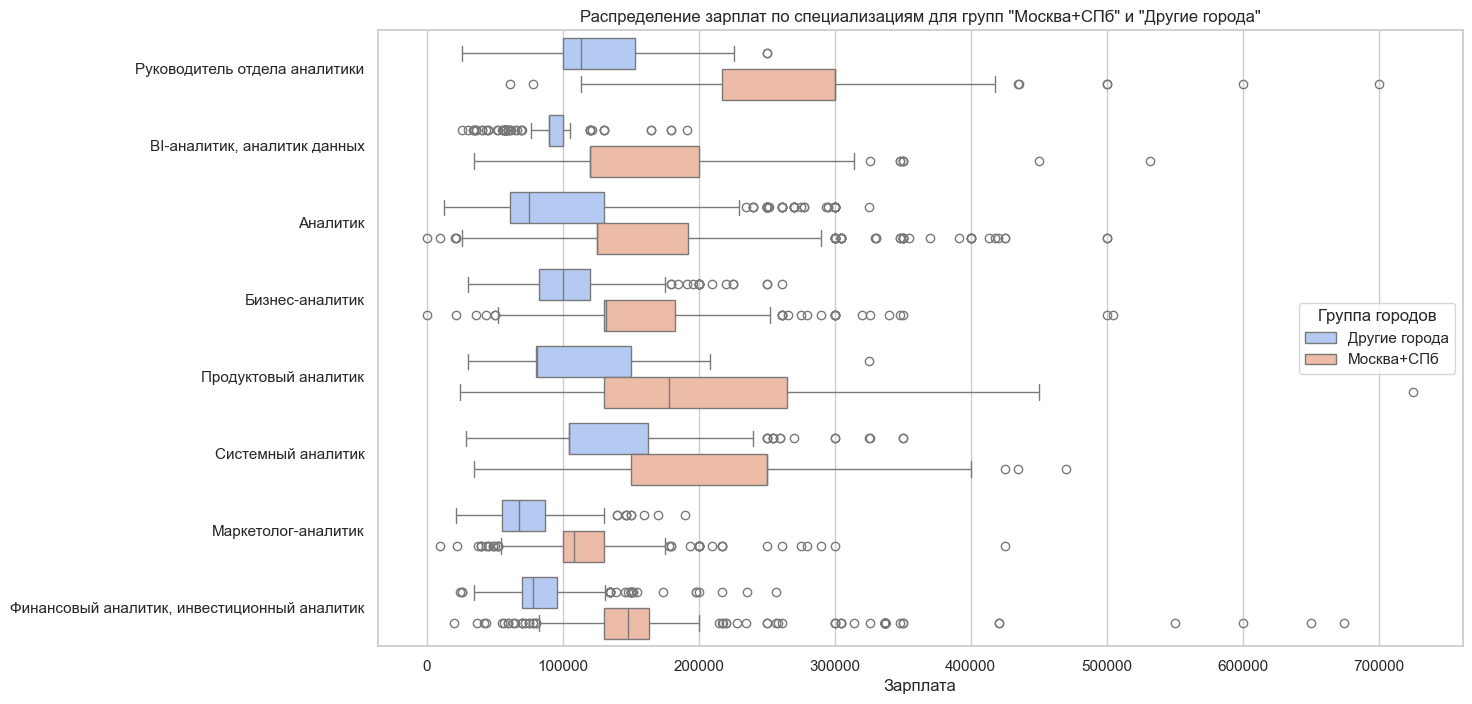

In [174]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='salary', y='role_name', hue='city_group', data=all_cities_data, palette='coolwarm')
plt.title('Распределение зарплат по специализациям для групп "Москва+СПб" и "Другие города"')
plt.xlabel('Зарплата')
plt.ylabel('')
plt.legend(title='Группа городов')
plt.show()

На графике отчетливо видно опережение зарплат в Москве и Санкт-Петербурге над остальными регионами.
По некоторым специализациям "коробки" графиков даже не пересекаются. При этом присутствует большое количество выбросов как в большую, так и в меньшую сторону.